In [1]:
import pandas as pd 

In [2]:
estudiantes =  pd.read_csv("../data/Student_Performance.csv")

In [3]:
estudiantes.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
print(estudiantes.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [6]:
print(f"\nFilas duplicadas: {estudiantes.duplicated().sum()}")


Filas duplicadas: 127


Aunque podrían existir estudiantes con las mismas notas y condiciones, he decidido eliminar estas filas duplicadas para un mejor rendimiento en el modelo. 

In [7]:
estudiantes = estudiantes.drop_duplicates()
print(f"\nVerificación - Duplicados restantes: {estudiantes.duplicated().sum()}")
estudiantes = estudiantes.reset_index(drop=True)


Verificación - Duplicados restantes: 0


In [8]:
estudiantes.shape

(9873, 6)

## Diccionario de datos

In [9]:
print("\nResumen de variables:")
print(estudiantes.describe(include='all'))

print("\n\nValores únicos por variable:")
for col in estudiantes.columns:
    n_unicos = estudiantes[col].nunique()
    print(f"\n{col}:")
    print(f"  - Tipo de dato: {estudiantes[col].dtype}")
    print(f"  - Valores únicos: {n_unicos}")
    
    if estudiantes[col].dtype == 'object' or n_unicos < 10:
        print(f"  - Distribución:")
        print(estudiantes[col].value_counts())


Resumen de variables:
        Hours Studied  Previous Scores Extracurricular Activities  \
count     9873.000000      9873.000000                       9873   
unique            NaN              NaN                          2   
top               NaN              NaN                         No   
freq              NaN              NaN                       4986   
mean         4.992100        69.441102                        NaN   
std          2.589081        17.325601                        NaN   
min          1.000000        40.000000                        NaN   
25%          3.000000        54.000000                        NaN   
50%          5.000000        69.000000                        NaN   
75%          7.000000        85.000000                        NaN   
max          9.000000        99.000000                        NaN   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count   9873.000000                       9873.000000        9873.000000 

In [10]:
diccionario_datos = pd.DataFrame({
    'Variable': [
        'Hours Studied',
        'Previous Scores',
        'Extracurricular Activities',
        'Sleep Hours',
        'Sample Question Papers Practiced',
        'Performance Index'
    ],
    'Tipo de Dato': [
        'Numérico (int)',
        'Numérico (int)',
        'Categórico (string)',
        'Numérico (int)',
        'Numérico (int)',
        'Numérico (float)'
    ],
    'Descripción': [
        'Número de horas que el estudiante dedica al estudio',
        'Puntajes obtenidos en evaluaciones anteriores',
        'Indica si el estudiante participa en actividades extracurriculares',
        'Número de horas de sueño que tiene el estudiante',
        'Cantidad de exámenes de práctica resueltos',
        'Índice de rendimiento académico del estudiante (variable objetivo)'
    ],
    'Rango/Valores': [
        '1 a 9 horas',
        '40 a 99 puntos',
        'Yes, No',
        '4 a 9 horas',
        '0 a 9 exámenes',
        '10.0 a 100.0'
    ]
})

print(diccionario_datos.to_string(index=False))

                        Variable        Tipo de Dato                                                        Descripción  Rango/Valores
                   Hours Studied      Numérico (int)                Número de horas que el estudiante dedica al estudio    1 a 9 horas
                 Previous Scores      Numérico (int)                      Puntajes obtenidos en evaluaciones anteriores 40 a 99 puntos
      Extracurricular Activities Categórico (string) Indica si el estudiante participa en actividades extracurriculares        Yes, No
                     Sleep Hours      Numérico (int)                   Número de horas de sueño que tiene el estudiante    4 a 9 horas
Sample Question Papers Practiced      Numérico (int)                         Cantidad de exámenes de práctica resueltos 0 a 9 exámenes
               Performance Index    Numérico (float) Índice de rendimiento académico del estudiante (variable objetivo)   10.0 a 100.0


In [11]:
estudiantes_transformed = estudiantes.copy()

estudiantes_transformed['Extracurricular_Binary'] = (estudiantes_transformed['Extracurricular Activities'] == 'Yes').astype(int)


In [12]:
print(estudiantes_transformed[['Extracurricular Activities', 'Extracurricular_Binary']].head(10))

  Extracurricular Activities  Extracurricular_Binary
0                        Yes                       1
1                         No                       0
2                        Yes                       1
3                        Yes                       1
4                         No                       0
5                         No                       0
6                        Yes                       1
7                        Yes                       1
8                         No                       0
9                         No                       0


# Análisis exploratorio de datos

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)


In [15]:
estudiantes_transformed.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Binary
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651,0.494986
std,2.589081,17.325601,1.697683,2.867202,19.208570,0.500000
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000


In [16]:
print("\n--- Estadística por variable ---")
for col in estudiantes_transformed.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'Extracurricular_Binary':
        print(f"\n{col}:")
        print(f"  Media: {estudiantes_transformed[col].mean():.2f}")
        print(f"  Mediana: {estudiantes_transformed[col].median():.2f}")
        print(f"  Desviación estándar: {estudiantes_transformed[col].std():.2f}")
        print(f"  Asimetría: {estudiantes_transformed[col].skew():.2f}")
        print(f"  Curtosis: {estudiantes_transformed[col].kurtosis():.2f}")


--- Estadística por variable ---

Hours Studied:
  Media: 4.99
  Mediana: 5.00
  Desviación estándar: 2.59
  Asimetría: -0.00
  Curtosis: -1.23

Previous Scores:
  Media: 69.44
  Mediana: 69.00
  Desviación estándar: 17.33
  Asimetría: 0.01
  Curtosis: -1.21

Sleep Hours:
  Media: 6.53
  Mediana: 7.00
  Desviación estándar: 1.70
  Asimetría: -0.04
  Curtosis: -1.26

Sample Question Papers Practiced:
  Media: 4.58
  Mediana: 5.00
  Desviación estándar: 2.87
  Asimetría: -0.03
  Curtosis: -1.21

Performance Index:
  Media: 55.22
  Mediana: 55.00
  Desviación estándar: 19.21
  Asimetría: -0.00
  Curtosis: -0.86


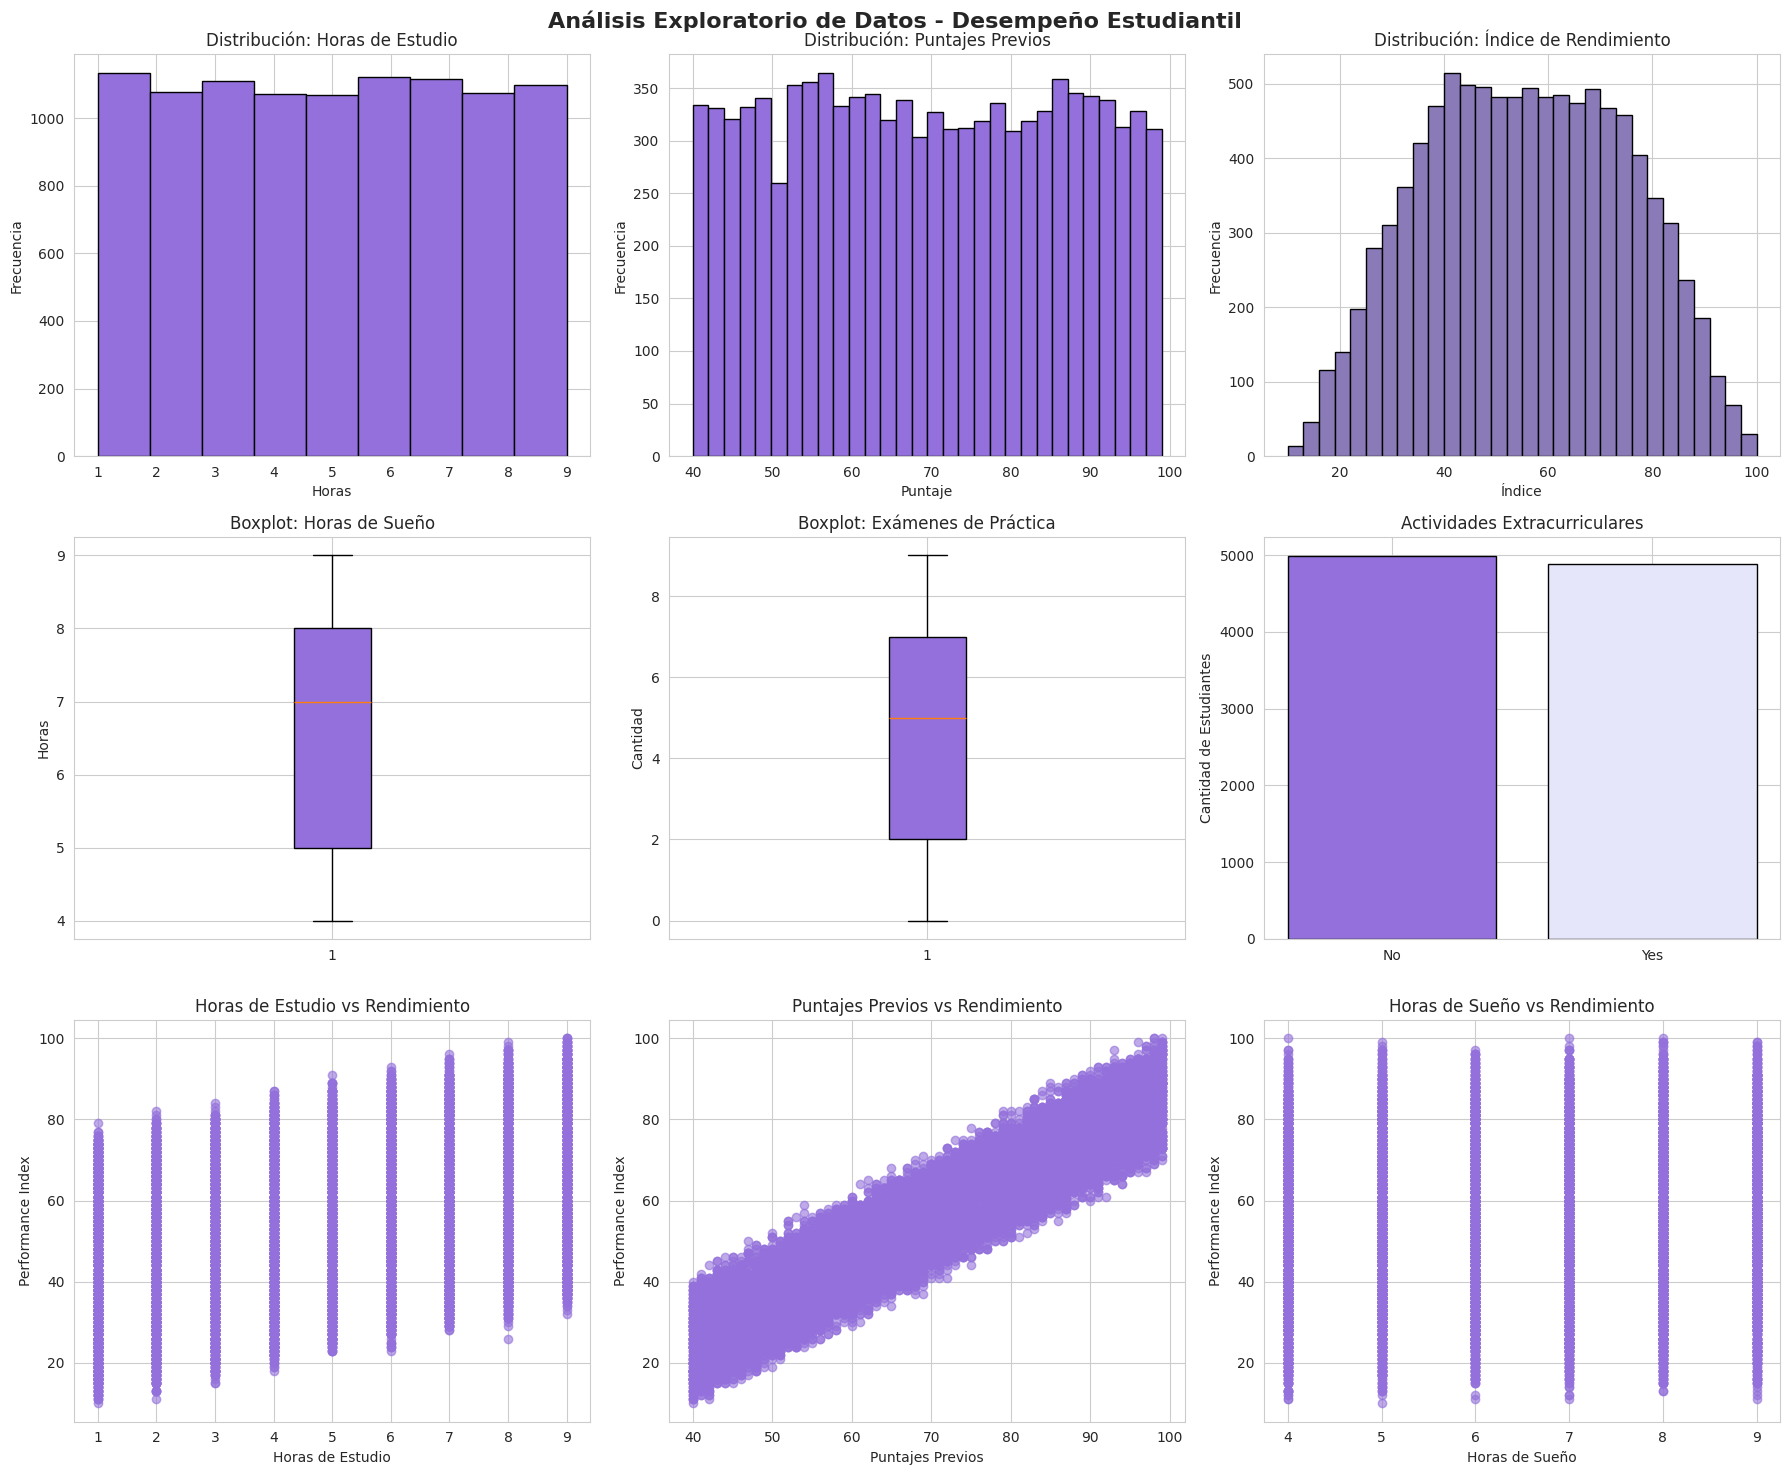

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Análisis Exploratorio de Datos - Desempeño Estudiantil', fontsize=16, fontweight='bold')

#horas estudiadas
axes[0, 0].hist(estudiantes_transformed['Hours Studied'], bins=9, edgecolor='black', color='#9370DB')
axes[0, 0].set_title('Distribución: Horas de Estudio')
axes[0, 0].set_xlabel('Horas')
axes[0, 0].set_ylabel('Frecuencia')

#notas de antes
axes[0, 1].hist(estudiantes_transformed['Previous Scores'], bins=30, edgecolor='black', color='#9370DB')
axes[0, 1].set_title('Distribución: Puntajes Previos')
axes[0, 1].set_xlabel('Puntaje')
axes[0, 1].set_ylabel('Frecuencia')

#rendimiento
axes[0, 2].hist(estudiantes_transformed['Performance Index'], bins=30, edgecolor='black', color='#8B7AB8')
axes[0, 2].set_title('Distribución: Índice de Rendimiento')
axes[0, 2].set_xlabel('Índice')
axes[0, 2].set_ylabel('Frecuencia')

#horas de sueño
bp1 = axes[1, 0].boxplot(estudiantes_transformed['Sleep Hours'], patch_artist=True)
bp1['boxes'][0].set_facecolor("#9370DB")
axes[1, 0].set_title('Boxplot: Horas de Sueño')
axes[1, 0].set_ylabel('Horas')

#examenes
bp2 = axes[1, 1].boxplot(estudiantes_transformed['Sample Question Papers Practiced'], patch_artist=True)
bp2['boxes'][0].set_facecolor('#9370DB')
axes[1, 1].set_title('Boxplot: Exámenes de Práctica')
axes[1, 1].set_ylabel('Cantidad')

#extracurriculares
activities_count = estudiantes_transformed['Extracurricular Activities'].value_counts()
axes[1, 2].bar(activities_count.index, activities_count.values, color=['#9370DB', '#E6E6FA'], edgecolor='black')
axes[1, 2].set_title('Actividades Extracurriculares')
axes[1, 2].set_ylabel('Cantidad de Estudiantes')

#horas de estudio vs rendimiento
axes[2, 0].scatter(estudiantes_transformed['Hours Studied'], estudiantes_transformed['Performance Index'], 
                   alpha=0.6, color='#9370DB')
axes[2, 0].set_title('Horas de Estudio vs Rendimiento')
axes[2, 0].set_xlabel('Horas de Estudio')
axes[2, 0].set_ylabel('Performance Index')

#ountajes anterioree vs rendimiento
axes[2, 1].scatter(estudiantes_transformed['Previous Scores'], estudiantes_transformed['Performance Index'], 
                   alpha=0.6, color='#9370DB')
axes[2, 1].set_title('Puntajes Previos vs Rendimiento')
axes[2, 1].set_xlabel('Puntajes Previos')
axes[2, 1].set_ylabel('Performance Index')

#horas de sueño vs rendimiento
axes[2, 2].scatter(estudiantes_transformed['Sleep Hours'], estudiantes_transformed['Performance Index'], 
                   alpha=0.6, color='#9370DB')
axes[2, 2].set_title('Horas de Sueño vs Rendimiento')
axes[2, 2].set_xlabel('Horas de Sueño')
axes[2, 2].set_ylabel('Performance Index')

plt.tight_layout()
plt.show()

El análisis descriptivo de las 9,873 observaciones revela un dataset excepcionalmente limpio y balanceado, lo cual garantiza la fiabilidad del modelado predictivo. A continuación se detallan los descubrimientos más relevantes:

* **Ausencia de Sesgo (Simetría Perfecta):** Todas las variables presentan una **asimetría (*Skewness*) cercana a 0.00**. Esto indica que no hay datos sesgados hacia valores extremos; el comportamiento de los estudiantes se distribuye de manera equitativa.
* **Cobertura Uniforme de Hábitos:** Variables como `Hours Studied` y `Previous Scores` presentan una **curtosis negativa (~ -1.2)**. Esto significa que las distribuciones son "planas" (uniformes): tenemos prácticamente la misma cantidad de estudiantes para cada nivel de horas de estudio (del 1 al 9) y para cada rango de notas. El modelo aprenderá de todos los escenarios por igual.
* **Estabilidad:** Variables como `Sleep Hours` y `Papers Practiced` siguen el mismo comportamiento uniforme y acotado, sin valores atípicos (*outliers*) que requieran tratamiento especial.
* **Actividades extracurriculares:** Hay una división casi exacta entre los que sí hacen y los que no, indicando que, probablemente, esta variable no afecte en el resultado del desempeño. Lo veremos más adelante.
* **Variables que impactan:** `Hours Studied` y `Previous Scores` muestran correlación positiva con el rendimiento final. 




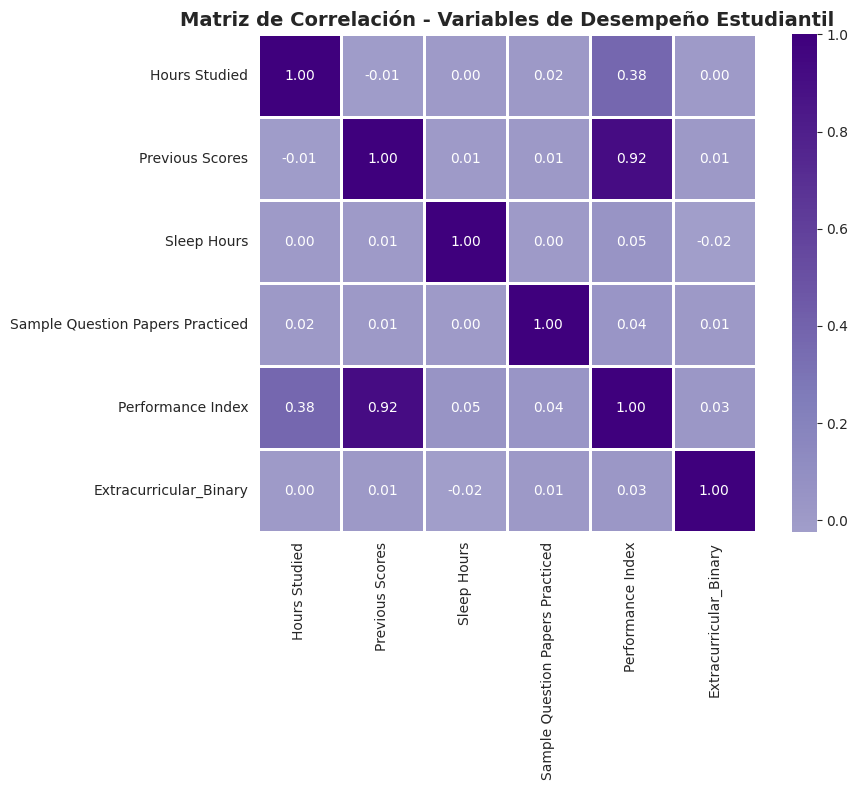

In [18]:
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 
                  'Sample Question Papers Practiced', 'Performance Index', 'Extracurricular_Binary']
correlation_matrix = estudiantes_transformed[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Variables de Desempeño Estudiantil', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

El análisis de correlación desmitifica algunas creencias comunes sobre el rendimiento estudiantil en este conjunto de datos:

* **El Factor Crítico:** La variable `Previous Scores` tiene una correlación de **0.92** con el resultado final. Esto indica que la base académica histórica es el predictor más potente del éxito futuro.
* **El Esfuerzo Cuenta:** `Hours Studied` mantiene una correlación positiva moderada (**0.38**), confirmando que aumentar las horas de estudio mejora el rendimiento, aunque en menor medida que tener una buena base.
* **Factores de Bajo Impacto:** Sorprendentemente, variables como `Sleep Hours` (0.05), `Extracurricular Activities` (0.02) y `Papers Practiced` (0.04) tienen una influencia marginal. Esto sugiere que, para este caso específico, **el conocimiento acumulado pesa más que los hábitos de estilo de vida**.

# ¿Hay diferencias entre hacer o no actividades extracurriculaares?

In [19]:
grupo_si = estudiantes_transformed[estudiantes_transformed['Extracurricular Activities'] == 'Yes']['Performance Index']
grupo_no = estudiantes_transformed[estudiantes_transformed['Extracurricular Activities'] == 'No']['Performance Index']


In [20]:
print("\nGrupo CON actividades extracurriculares:")
print(f"  n = {len(grupo_si)}")
print(f"  Media = {grupo_si.mean():.2f}")
print(f"  Mediana = {grupo_si.median():.2f}")
print(f"  Desviación estándar = {grupo_si.std():.2f}")
print(f"  Mínimo = {grupo_si.min():.2f}")
print(f"  Máximo = {grupo_si.max():.2f}")

print("\nGrupo SIN actividades extracurriculares:")
print(f"  n = {len(grupo_no)}")
print(f"  Media = {grupo_no.mean():.2f}")
print(f"  Mediana = {grupo_no.median():.2f}")
print(f"  Desviación estándar = {grupo_no.std():.2f}")
print(f"  Mínimo = {grupo_no.min():.2f}")
print(f"  Máximo = {grupo_no.max():.2f}")

print(f"\nDiferencia de medias: {grupo_si.mean() - grupo_no.mean():.2f}")


Grupo CON actividades extracurriculares:
  n = 4887
  Media = 55.72
  Mediana = 55.00
  Desviación estándar = 19.26
  Mínimo = 11.00
  Máximo = 100.00

Grupo SIN actividades extracurriculares:
  n = 4986
  Media = 54.72
  Mediana = 55.00
  Desviación estándar = 19.15
  Mínimo = 10.00
  Máximo = 99.00

Diferencia de medias: 1.00


/tmp/ipykernel_77680/2328013492.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([grupo_no, grupo_si], labels=['No', 'Yes'], patch_artist=True)


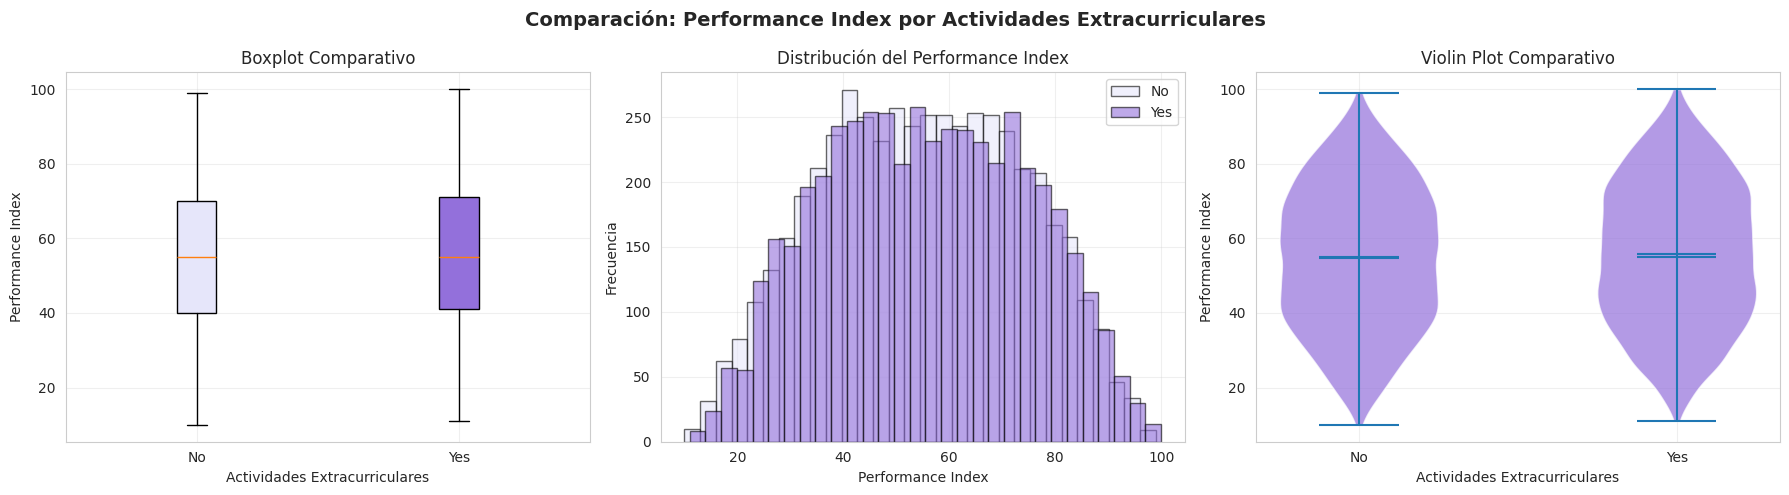

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación: Performance Index por Actividades Extracurriculares', 
             fontsize=14, fontweight='bold')

#boxplot
bp = axes[0].boxplot([grupo_no, grupo_si], labels=['No', 'Yes'], patch_artist=True)
bp['boxes'][0].set_facecolor('#E6E6FA')
bp['boxes'][1].set_facecolor('#9370DB')
axes[0].set_title('Boxplot Comparativo')
axes[0].set_xlabel('Actividades Extracurriculares')
axes[0].set_ylabel('Performance Index')
axes[0].grid(True, alpha=0.3)

#histogramas
axes[1].hist(grupo_no, bins=30, alpha=0.6, label='No', color='#E6E6FA', edgecolor='black')
axes[1].hist(grupo_si, bins=30, alpha=0.6, label='Yes', color='#9370DB', edgecolor='black')
axes[1].set_title('Distribución del Performance Index')
axes[1].set_xlabel('Performance Index')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

#violin
parts = axes[2].violinplot([grupo_no, grupo_si], positions=[1, 2], 
                            showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('#9370DB')
    pc.set_alpha(0.7)
axes[2].set_xticks([1, 2])
axes[2].set_xticklabels(['No', 'Yes'])
axes[2].set_title('Violin Plot Comparativo')
axes[2].set_xlabel('Actividades Extracurriculares')
axes[2].set_ylabel('Performance Index')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A primera vista, se puede observar que en realidad no hay muchas diferencias entre ambos grupos: La mediana se sitúa casi en el mismo nivel, los histogramas de distribución se superponen casi que completamente y la forma de los violines es prácticamente idéntica. Verificaremos esto con pruebas estadísticas. 

In [22]:
#normalidad
from scipy import stats

stat_si, p_si = stats.shapiro(grupo_si.sample(min(5000, len(grupo_si))))
stat_no, p_no = stats.shapiro(grupo_no.sample(min(5000, len(grupo_no))))

print(f"\nGrupo CON actividades:")
print(f"  Estadístico = {stat_si:.4f}")
print(f"  p-value = {p_si:.4f}")

print(f"\nGrupo SIN actividades:")
print(f"  Estadístico = {stat_no:.4f}")
print(f"  p-value = {p_no:.4f}")


Grupo CON actividades:
  Estadístico = 0.9833
  p-value = 0.0000

Grupo SIN actividades:
  Estadístico = 0.9848
  p-value = 0.0000


Ambos grupos no tienen una distribución normal. 

In [23]:
#homogeneidad de varianzas
stat_levene, p_levene = stats.levene(grupo_si, grupo_no)
print(f"Estadístico = {stat_levene:.4f}")
print(f"p-value = {p_levene:.4f}")

Estadístico = 0.4300
p-value = 0.5120


Al dar un p-valor de 0.5 mayor a 0.05, podemos concluir que tienen varianzas homogéneas. 

In [24]:
#t student
stat_t, p_t = stats.ttest_ind(grupo_si, grupo_no)
print(f"Estadístico t = {stat_t:.4f}")
print(f"p-value = {p_t:.4f}")


Estadístico t = 2.5915
p-value = 0.0096


El resultado del p-valor 0.0096 indica que hay diferencia significativa. A pesar de que el test de normalidad dio negativo, decidí usar esta prueba paramétrica por el teorema del límite central. 

In [25]:
#u mann whitney
stat_u, p_u = stats.mannwhitneyu(grupo_si, grupo_no, alternative='two-sided')
print(f"Estadístico U = {stat_u:.4f}")
print(f"p-value = {p_u:.4f}")

Estadístico U = 12510731.5000
p-value = 0.0207


Ahora, complementando con la prueba U mann whitney, también se llegó a la conclusión de que hay diferencia significativa con un p-valor de 0.0207 menor a 0.05. Ambas pruebas confirman la existencia de diferencias estadísticamente significativas, lo que refuerza la validez de los resultados.

In [26]:
#tamaño del efecto
cohens_d = (grupo_si.mean() - grupo_no.mean()) / np.sqrt((grupo_si.std()**2 + grupo_no.std()**2) / 2)
print(f"Cohen's d = {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    efecto = "DESPRECIABLE"
elif abs(cohens_d) < 0.5:
    efecto = "PEQUEÑO"
elif abs(cohens_d) < 0.8:
    efecto = "MEDIANO"
else:
    efecto = "GRANDE"
print(f"Interpretación: Tamaño del efecto {efecto}")

Cohen's d = 0.0522
Interpretación: Tamaño del efecto DESPRECIABLE


Apesar de los resultados anteriores, el tamaño del efecto (Cohen's d = 0.0522) indica que esta diferencia carece de relevancia práctica. Por lo que podemos afirmar que las actividades extracurriculares no juegan un papel importante en el rendimiento académico del estudiante.

# Clustering

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X_clustering = estudiantes_transformed[numerical_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertias = []
silhouette_scores = []
db_scores = []
ch_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

print("\nTabla de métricas por número de clusters:")
metricas_df = pd.DataFrame({
    'K': list(k_range),
    'Inercia': inertias,
    'Silhouette': [round(s, 4) for s in silhouette_scores],
    'Davies-Bouldin': [round(d, 4) for d in db_scores],
    'Calinski-Harabasz': [round(c, 2) for c in ch_scores]
})
print(metricas_df.to_string(index=False))

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n** Mejor k según Silhouette Score: {best_k} **")


Tabla de métricas por número de clusters:
 K      Inercia  Silhouette  Davies-Bouldin  Calinski-Harabasz
 2 45021.334040      0.2149          1.7496            3117.04
 3 39601.103397      0.1880          1.7566            2447.11
 4 35119.682669      0.1933          1.8255            2259.17
 5 32864.583027      0.1808          1.7274            1979.75

** Mejor k según Silhouette Score: 2 **


CLUSTER 0
Tamaño: 4963 estudiantes (50.3%)

Estadísticas:
  Hours Studied: 4.62
  Previous Scores: 54.87
  Sleep Hours: 6.48
  Sample Question Papers Practiced: 4.48
  Performance Index: 39.22
  Actividades Extracurriculares: 49.4% participa
CLUSTER 1
Tamaño: 4910 estudiantes (49.7%)

Estadísticas:
  Hours Studied: 5.37
  Previous Scores: 84.17
  Sleep Hours: 6.58
  Sample Question Papers Practiced: 4.69
  Performance Index: 71.39
  Actividades Extracurriculares: 49.6% participa


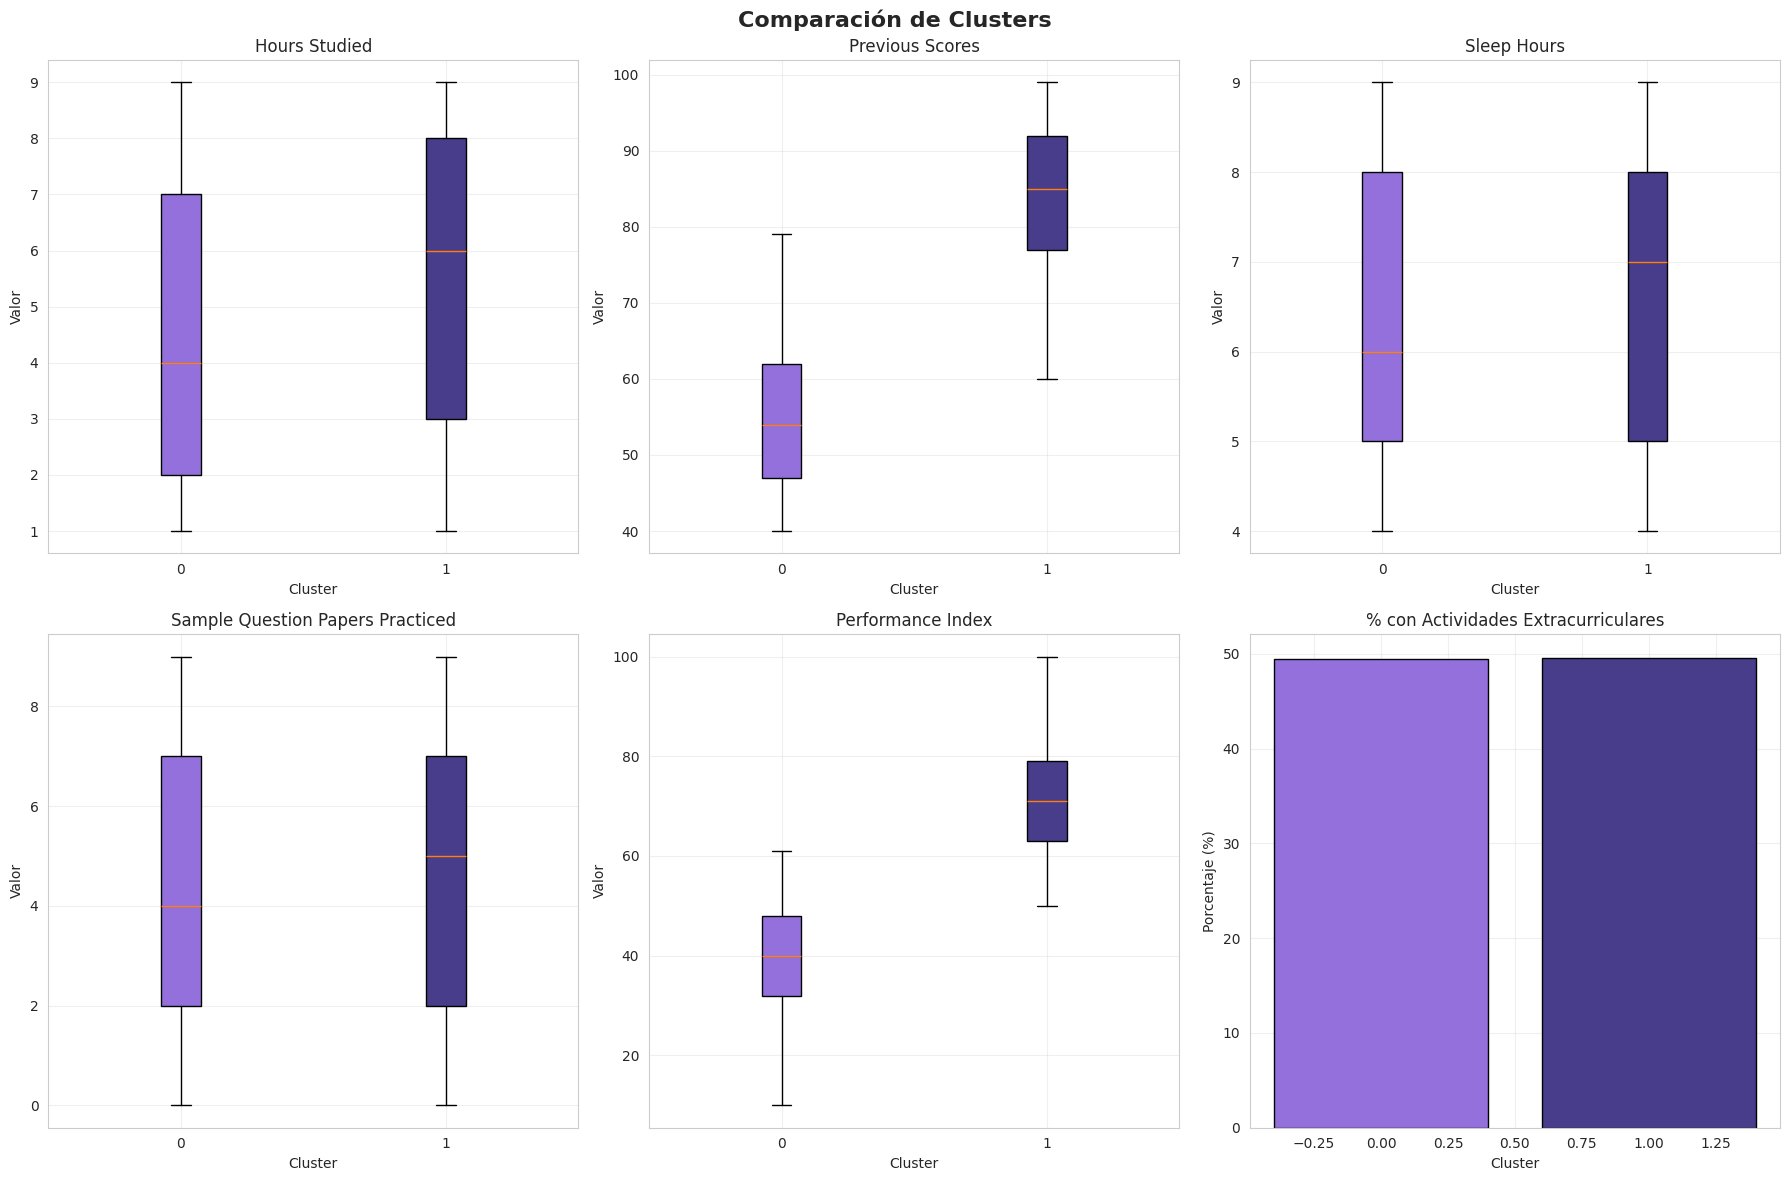

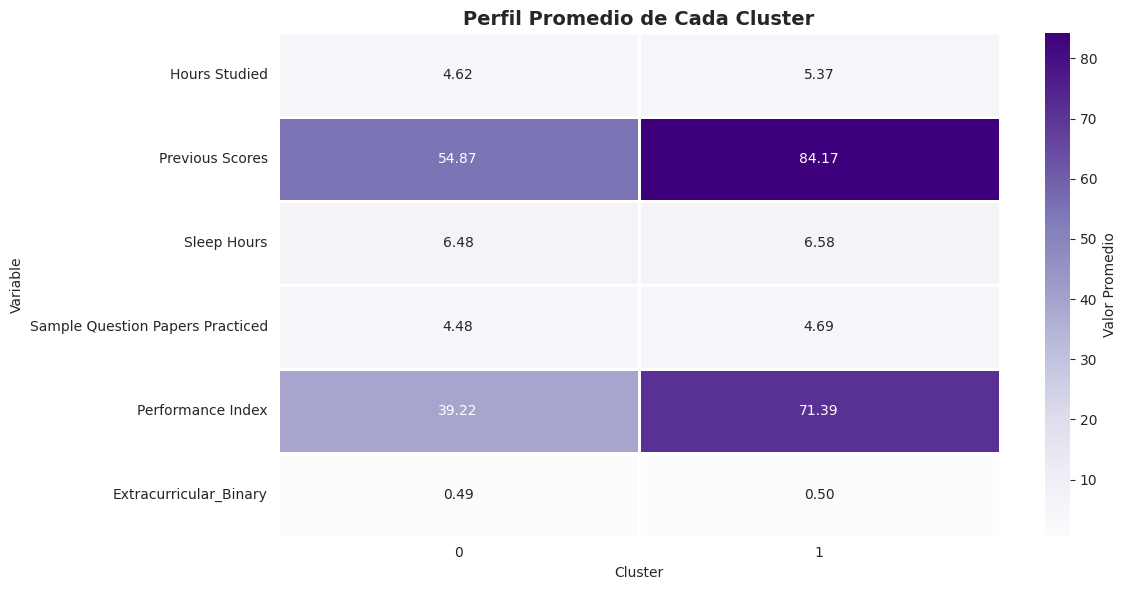

In [28]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
estudiantes_transformed['Cluster_k2'] = kmeans_final.fit_predict(X_scaled)

#analiis detallado de cada cluster
cluster_ids = sorted(estudiantes_transformed['Cluster_k2'].unique())

for cluster_id in cluster_ids:
    print(f"CLUSTER {cluster_id}")
    
    cluster_data = estudiantes_transformed[estudiantes_transformed['Cluster_k2'] == cluster_id]
    print(f"Tamaño: {len(cluster_data)} estudiantes ({len(cluster_data)/len(estudiantes_transformed)*100:.1f}%)")
    
    print("\nEstadísticas:")
    for col in numerical_cols:
        if col != 'Extracurricular_Binary':
            mean_val = cluster_data[col].mean()
            print(f"  {col}: {mean_val:.2f}")
    
    ext_pct = (cluster_data['Extracurricular_Binary'].sum() / len(cluster_data)) * 100
    print(f"  Actividades Extracurriculares: {ext_pct:.1f}% participa")

#comparaciones entre clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparación de Clusters', fontsize=16, fontweight='bold')

colores_morados = ['#9370DB', '#483D8B']

vars_visualizar = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 
                   'Sample Question Papers Practiced', 'Performance Index']

for idx, variable in enumerate(vars_visualizar):
    fila = idx // 3
    columna = idx % 3
    
    datos_clusters = [estudiantes_transformed[estudiantes_transformed['Cluster_k2'] == i][variable] 
                      for i in cluster_ids]
    
    bp = axes[fila, columna].boxplot(datos_clusters, tick_labels=cluster_ids, patch_artist=True)
    for caja, color in zip(bp['boxes'], colores_morados):
        caja.set_facecolor(color)
    
    axes[fila, columna].set_title(variable)
    axes[fila, columna].set_xlabel('Cluster')
    axes[fila, columna].set_ylabel('Valor')
    axes[fila, columna].grid(True, alpha=0.3)

ext_clusters = estudiantes_transformed.groupby('Cluster_k2')['Extracurricular_Binary'].mean() * 100
axes[1, 2].bar(ext_clusters.index, ext_clusters.values, color=colores_morados, edgecolor='black')
axes[1, 2].set_title('% con Actividades Extracurriculares')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Porcentaje (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#mapa de calor
promedios_cluster = estudiantes_transformed.groupby('Cluster_k2')[numerical_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(promedios_cluster.T, annot=True, fmt='.2f', cmap='Purples', 
            cbar_kws={'label': 'Valor Promedio'}, linewidths=1)
plt.title('Perfil Promedio de Cada Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


El algoritmo dividió a la población estudiantil en dos grupos claramente diferenciados por su desempeño:

* **Cluster 0 (Etiquetado como Riesgo):** Agrupa a estudiantes con índices de rendimiento inferiores a la media y patrones de hábitos menos efectivos.
* **Cluster 1 (Etiquetado como Seguro):** Agrupa a estudiantes con alto rendimiento académico.

# Modelado

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, mean_squared_error, r2_score
import joblib

#### Creación de la Variable `Low_Performance`
A partir de la segmentación de los clusters, generamos la nueva variable objetivo binaria:
* **1 (Alto Riesgo):** Estudiantes pertenecientes al Cluster 0.
* **0 (Bajo Riesgo):** Estudiantes pertenecientes al Cluster 1.

In [30]:
estudiantes_transformed['Low_Performance'] = np.where(estudiantes_transformed['Cluster_k2'] == 0, 1, 0)

vars_a_eliminar = ['Performance Index', 'Cluster_k2', 'Low_Performance', 'Extracurricular Activities']
X = estudiantes_transformed.drop(vars_a_eliminar, axis=1)

feature_names = X.columns.tolist()

scaler_api = StandardScaler()
X_scaled = scaler_api.fit_transform(X)

y_class = estudiantes_transformed['Low_Performance'] 
y_reg = estudiantes_transformed['Performance Index'] 

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X_scaled, y_class, y_reg, test_size=0.2, random_state=42
)

In [31]:
#regresión
print("--- Modelo de regresión ---")
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f"Regresión Lineal RMSE: {rmse:.4f}")

--- Modelo de regresión ---
Regresión Lineal RMSE: 2.0751


Este resultado es excelente, pues cuando el modelo predice una nota, se equivoca, en promedio, por solo +/- 2 puntos de 100. Significando que tiene una precisión alta. 

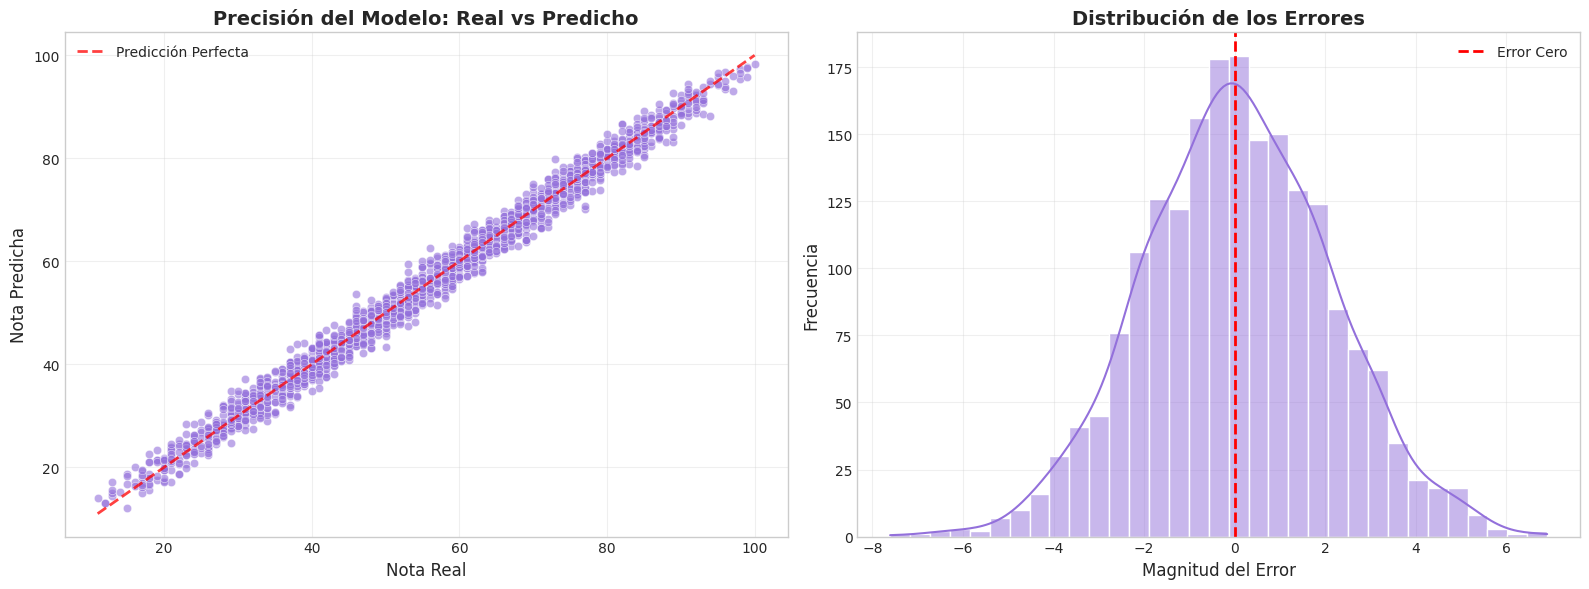

Error Máximo cometido: 7.61 puntos
El 95% de los errores están entre: -3.99 y 4.27 puntos


In [32]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#scatter
sns.scatterplot(x=y_reg_test, y=y_reg_pred, alpha=0.6, color='#9370DB', ax=ax[0])

lims = [min(y_reg_test.min(), y_reg_pred.min()), max(y_reg_test.max(), y_reg_pred.max())]
ax[0].plot(lims, lims, 'r--', alpha=0.75, linewidth=2, label='Predicción Perfecta')

ax[0].set_title('Precisión del Modelo: Real vs Predicho', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Nota Real', fontsize=12)
ax[0].set_ylabel('Nota Predicha', fontsize=12)
ax[0].legend()
ax[0].grid(True, alpha=0.3)

#distribucion de errores
residuos = y_reg_test - y_reg_pred

sns.histplot(residuos, kde=True, color='#9370DB', ax=ax[1])
ax[1].axvline(0, color='r', linestyle='--', linewidth=2, label='Error Cero')

ax[1].set_title('Distribución de los Errores', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Magnitud del Error', fontsize=12)
ax[1].set_ylabel('Frecuencia', fontsize=12)
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Error Máximo cometido: {np.max(np.abs(residuos)):.2f} puntos")
print(f"El 95% de los errores están entre: {np.percentile(residuos, 2.5):.2f} y {np.percentile(residuos, 97.5):.2f} puntos")

In [33]:
#clasificación
print("\n--- Comparación modelos de clasificacón ---")

modelos = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

best_recall = 0
best_model = None
best_name = ""

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_class_train)
    y_pred = modelo.predict(X_test)
    
    recall = recall_score(y_class_test, y_pred)
    print(f"Modelo: {nombre}")
    print(f"Recall: {recall:.4f}")
    
    if recall > best_recall:
        best_recall = recall
        best_model = modelo
        best_name = nombre

print("")
print(f"GANADOR: {best_name} con Recall de {best_recall:.4f}")


joblib.dump(best_model, 'modelo_riesgo.pkl')
joblib.dump(scaler_api, 'scaler.pkl')
joblib.dump(feature_names, 'features.pkl')


--- Comparación modelos de clasificacón ---
Modelo: Logistic Regression
Recall: 0.9876
Modelo: Random Forest
Recall: 0.9814
Modelo: SVM
Recall: 0.9887

GANADOR: SVM con Recall de 0.9887


['features.pkl']

He decidido usar recall como métrica principal pues considero que es más importante minimizar el número de falsos negativos, esto para que ningún estudiante en riesgo quede sin detectar y que puedan recibir la ayuda necesaria para tener un desempeño alto. 

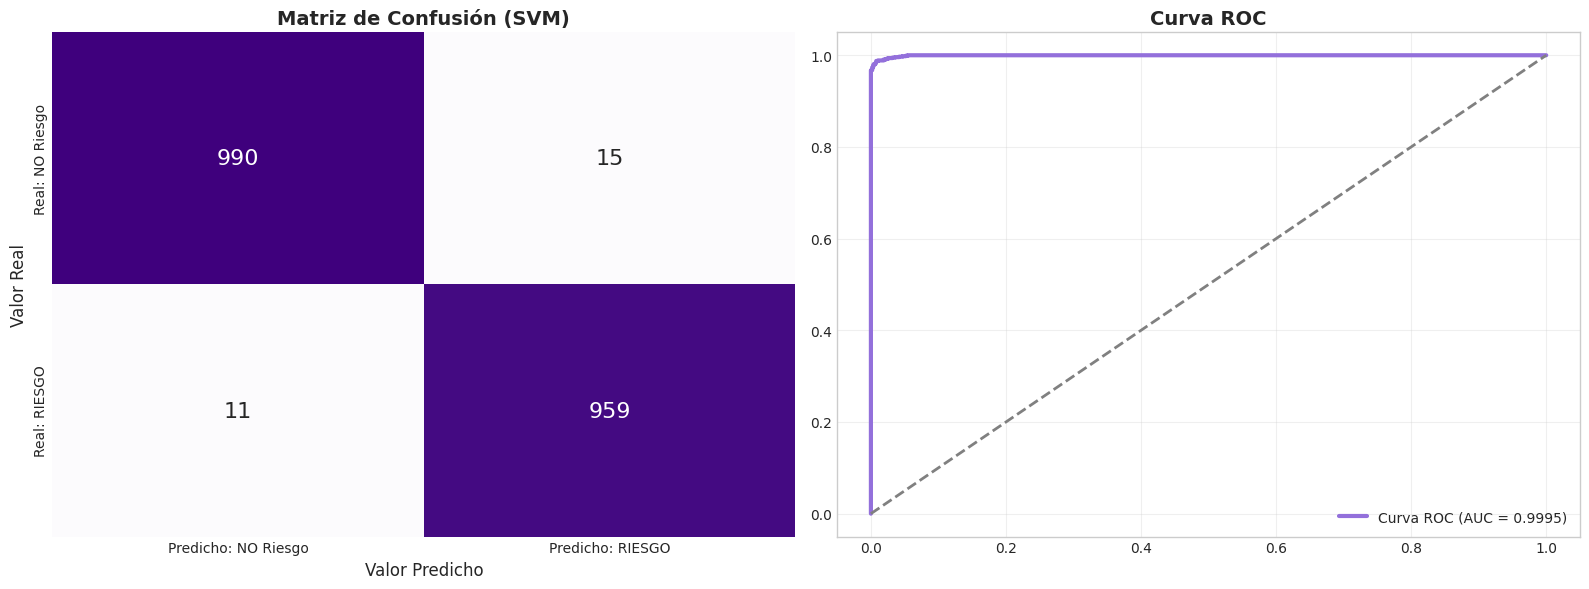

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred_class = best_model.predict(X_test)

y_score = best_model.decision_function(X_test)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

cm = confusion_matrix(y_class_test, y_pred_class)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicho: NO Riesgo', 'Predicho: RIESGO'],
            yticklabels=['Real: NO Riesgo', 'Real: RIESGO'],
            ax=ax[0], annot_kws={"size": 16})

ax[0].set_title('Matriz de Confusión (SVM)', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Valor Real', fontsize=12)
ax[0].set_xlabel('Valor Predicho', fontsize=12)

fpr, tpr, _ = roc_curve(y_class_test, y_score)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='#9370DB', lw=3, label=f'Curva ROC (AUC = {roc_auc:.4f})')
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

ax[1].set_title('Curva ROC', fontsize=14, fontweight='bold')
ax[1].legend(loc="lower right")
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
